## Importación de bibliotecas 

In [37]:
# Entorno de ejecución

# if (firstrun):
if('google.colab' in str(get_ipython() ) ):
    environment= 'google'
else:
    import os
    if (os.environ.get('PWD')=='/kaggle/working'):
        environment= 'kaggle'
    else:
        environment= 'local'
print(environment)

local


In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from tensorflow.keras.utils  import load_img

# Métricas
from sklearn.metrics import mean_squared_error
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score

# Funciones de utilidad

In [39]:
# function that lets you view a cluster (based on identifier)
def view_cluster(gps,cluster):
    plt.figure(figsize = (25,25));
    # gets the list of filenames for a cluster
    files = gps
    # only allow up to 30 images to be shown at a time
    if len(files) > 10:
        print(f"Clipping cluster size from {len(files)} to 10")
        files = files[:9]
    # plot each image in the cluster
    for index, file in enumerate(files):
        plt.subplot(1,10,index+1);
        img = load_img(file)
        img = np.array(img)
        plt.imshow(img)
        plt.title('Cluster n:' + str(cluster))
        plt.axis('off')

## Carga de datos

Si trabajan local
**ESCRIBIR EN SYSTEM PATH EL QUE CORRESPONDA A SUS COMPUTADORAS**

Si trabajan en colab
**ESCRIBIR EN SYSTEM PATH EL QUE CORRESPONDA A SU DRIVE**

In [40]:
# Directorio base ( cambiar según el sistema de archivos de cada uno)
# if (firstrun):
if( environment== 'local' ):
    system_path = "C:/Users/vanes/Documents/UBA/2do_cuatrimestre/DMCyT/TP/"
    # system_path = '/home/vbettachini/documents/universitet/FCEyN/maestríaDatos/cienciaTecnología/'
elif( ( environment== 'google' ) ): 
    from google.colab import drive
    drive.mount('/content/drive')
    system_path = "/content/drive/MyDrive/maestría/cienciaTecnología/"
elif( ( environment== 'kaggle' ) )  :
    a= 1

# Directorio del dataset
dataset_path = system_path + "tp1_dmcyt2023/datasets/Rice_Image_Dataset"

In [41]:
# Path a subset imágenes generado por `random_sample_rice_images.ipynb`
image_path = dataset_path + "/random_sample_rice_images"

In [42]:
# Cargamos datos 
data = np.load(image_path + '/vgg16output.npz')
data.files

['feat', 'names']

In [43]:
names = data['names']
feat = data['feat']

In [44]:
# Cantidad de registros / observaciones
len(feat)

5000

In [45]:
len(names)

5000

In [46]:
names

array(['C:/Users/vanes/Documents/UBA/2do_cuatrimestre/DMCyT/TP/tp1_dmcyt2023/datasets/Rice_Image_Dataset/random_sample_rice_images\\Arborio (1002).jpg',
       'C:/Users/vanes/Documents/UBA/2do_cuatrimestre/DMCyT/TP/tp1_dmcyt2023/datasets/Rice_Image_Dataset/random_sample_rice_images\\Arborio (10075).jpg',
       'C:/Users/vanes/Documents/UBA/2do_cuatrimestre/DMCyT/TP/tp1_dmcyt2023/datasets/Rice_Image_Dataset/random_sample_rice_images\\Arborio (10088).jpg',
       ...,
       'C:/Users/vanes/Documents/UBA/2do_cuatrimestre/DMCyT/TP/tp1_dmcyt2023/datasets/Rice_Image_Dataset/random_sample_rice_images\\basmati (9956).jpg',
       'C:/Users/vanes/Documents/UBA/2do_cuatrimestre/DMCyT/TP/tp1_dmcyt2023/datasets/Rice_Image_Dataset/random_sample_rice_images\\basmati (9963).jpg',
       'C:/Users/vanes/Documents/UBA/2do_cuatrimestre/DMCyT/TP/tp1_dmcyt2023/datasets/Rice_Image_Dataset/random_sample_rice_images\\basmati (9984).jpg'],
      dtype='<U144')

In [47]:
# Cantidad de características por cada observación
len(feat[0])

4096

## 6.a K-means

Consigna: Aplicar KMeans sobre el conjuntos de datos (con distintas métricas, normalizaciones,
combinaciones, etc). Determinar la cantidad de clusters utilizando silhuette y SSE.

Aplicaremos un modelo de aprendizaje automático no supervisado llamado Kmeans que nos permitirá agrupar lar imagenes en clusters dependiendo de las características visuales de cada una. Tomaremos la salida del modelo VGG16 mencionado anteriormente (apartado anterior) la cual tiene una estructura de 5000 observaciones y 4096 características.

- **Normalización de los datos**: Los datos input de este modelo los utilizaremos en una primera iteración sin normalizar y en una segunda parte utilizando la técnica de normalización Zscore.

In [55]:
x = feat
x_normalizado = 1

- **Modelo**: Implementaremos modelos de Kmeans utilizando variando la cantidad de clusters y observando sus resultados.

**n_clusters = 3**

In [56]:
# Apliquemos Kmeans con el total de las características (4096) y n=3
kmeans = KMeans(n_clusters=3)
kmeans.fit(x)

c:\Users\vanes\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [53]:
# Agrupamos las imagenes en un diccionario con la etiqueta obtenida por el modelo
groups = {}
for file, cluster in zip(names,kmeans.labels_):
    if cluster not in groups.keys():
        groups[cluster] = []
        groups[cluster].append(file)
    else:
        groups[cluster].append(file)

Clipping cluster size from 1780 to 10
Clipping cluster size from 1328 to 10
Clipping cluster size from 1892 to 10


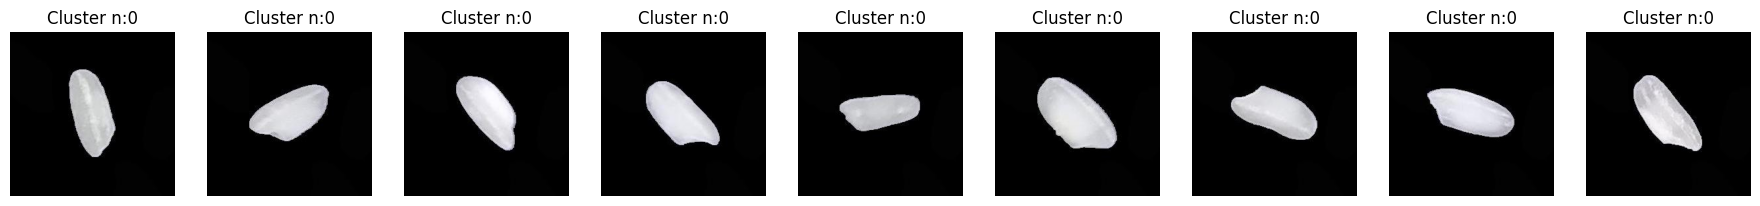

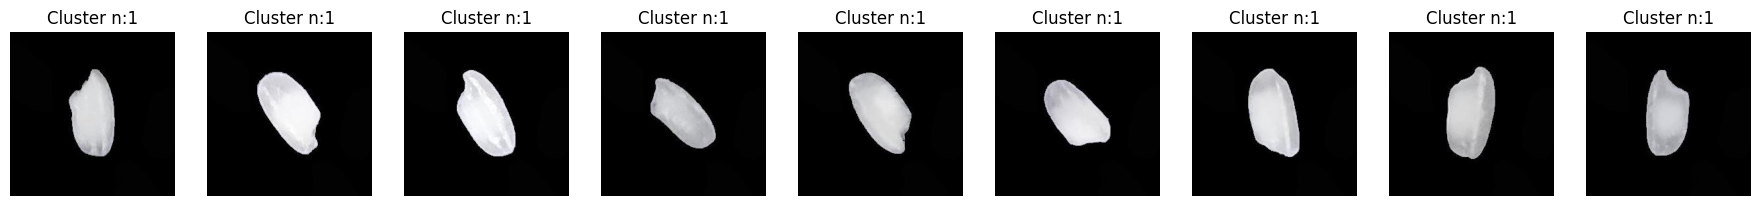

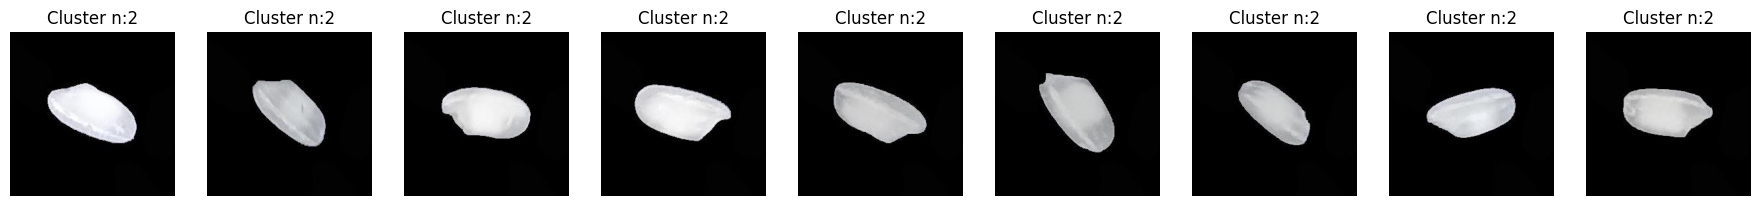

In [54]:
# Graficamos una muestra de cada cluster
for n in range(len(groups)):
  view_cluster(groups[n],n)

- **Métricas**: 

Usaremos dos métricas para evaluar la calidad de los clusters obtenidos en cada implementación SSE y el Silhouette Score. Estas dos nos permitirán medir la coherencia y la separación de los mismos. 

SSE: Mide la dispersión de las observaciones dentro de cada cluster, cuanto menor sea el SSE, más compactos y coherentes serán los clusters. 

Silhouette Score: Mide cuán similar es cada punto de datos a su propio cluster comparándolo con otros clusters cercanos. Este score varía entre -1 y 1 y mientras más cerano a 1 indicará que el punto está bien agrupado, cuanto más cercano a cero o negativo sea, indicará que está en el cluster incorrecto

**SSE:**

In [57]:
# Calculamos el SSE para el modelo con n_clusters = 3
labels = kmeans.predict(x)
centroides = kmeans.cluster_centers_
sse = 0  
for i in range(len(x)):
    cluster_center = centroides[labels[i]]
    sse += np.sum((x[i] - cluster_center) ** 2)

print("SSE:", sse)

SSE: 5536845.535400391


**Silhouette**:

In [59]:
silhouette_avg = silhouette_score(x, labels)

print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.14964862


**Implementación para distintos valores de n_clusters:**

In [68]:
k_range = [i for i in range(2,20)]
sse_list = []
silhouette_list = []
modelos = []

for i in k_range:
    # Aplico el modelo
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(x)
    
    # Guardo el modelo 
    modelos.append(kmeans)
    
    # Evaluo métricas
    # SSE:
    labels = kmeans.predict(x)
    centroides = kmeans.cluster_centers_
    sse = 0  
    for i in range(len(x)):
        cluster_center = centroides[labels[i]]
        sse += np.sum((x[i] - cluster_center) ** 2)
    # Guardo score
    sse_list.append(sse)
    
    # Silhouette Score
    silhouette_avg = silhouette_score(x, labels)
    # Guardo score
    silhouette_list.append(silhouette_avg)

c:\Users\vanes\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\vanes\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\vanes\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\vanes\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

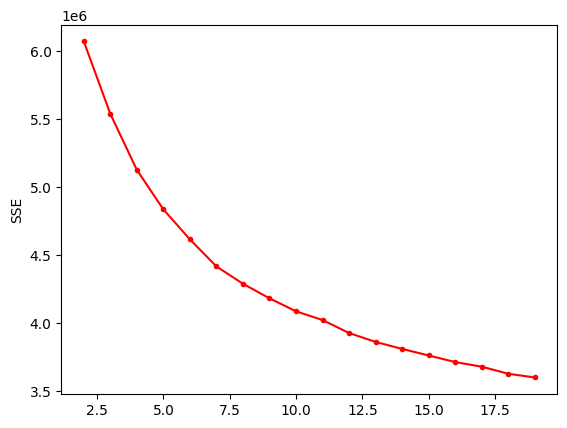

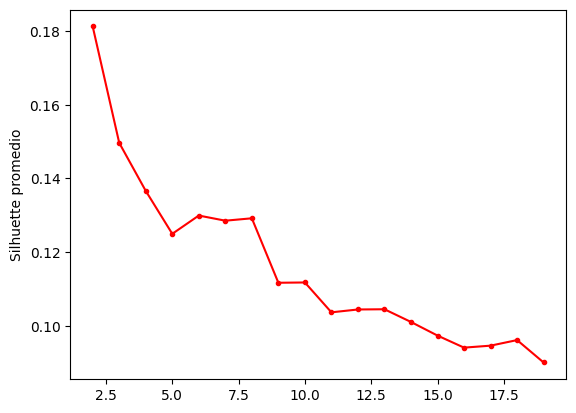

In [69]:
# Graficamos
plt.plot(k_range,sse_list,'r.-')
plt.ylabel('SSE')
plt.show()

plt.plot(k_range,silhouette_list,'r.-')
plt.ylabel('Silhuette promedio')
plt.show()

In [70]:
# Observemos con n_clusters = 7
groups = {}
for file, cluster in zip(names,modelos[6].labels_):
    if cluster not in groups.keys():
        groups[cluster] = []
        groups[cluster].append(file)
    else:
        groups[cluster].append(file)

Clipping cluster size from 748 to 10
Clipping cluster size from 980 to 10
Clipping cluster size from 773 to 10
Clipping cluster size from 461 to 10
Clipping cluster size from 529 to 10
Clipping cluster size from 726 to 10
Clipping cluster size from 496 to 10
Clipping cluster size from 287 to 10


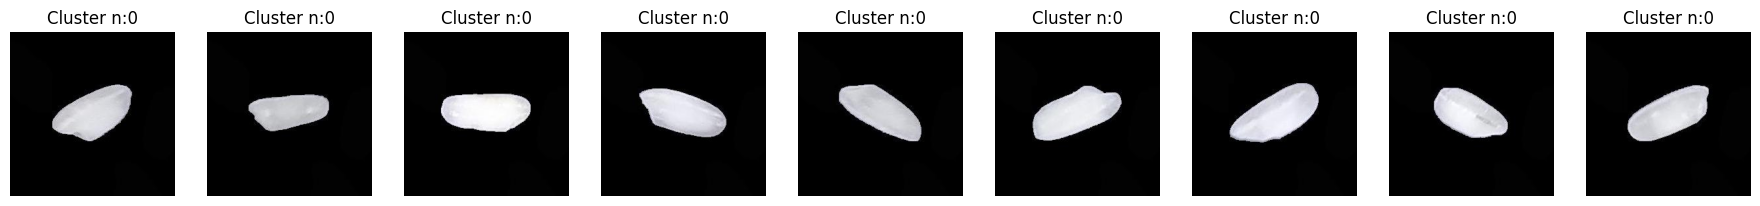

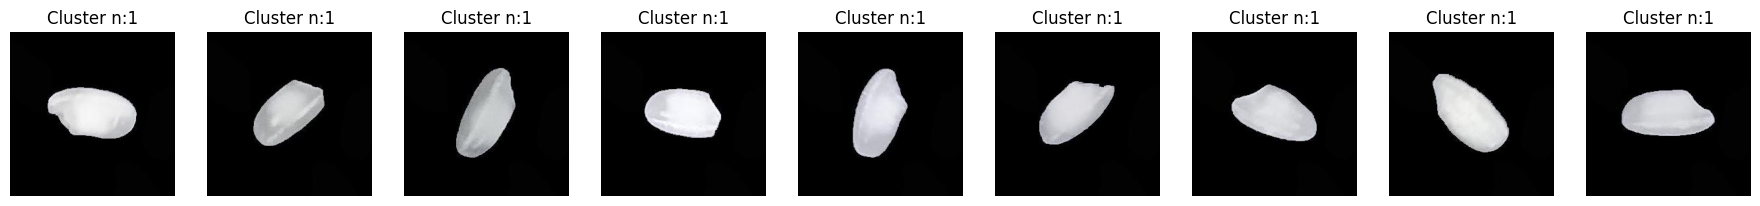

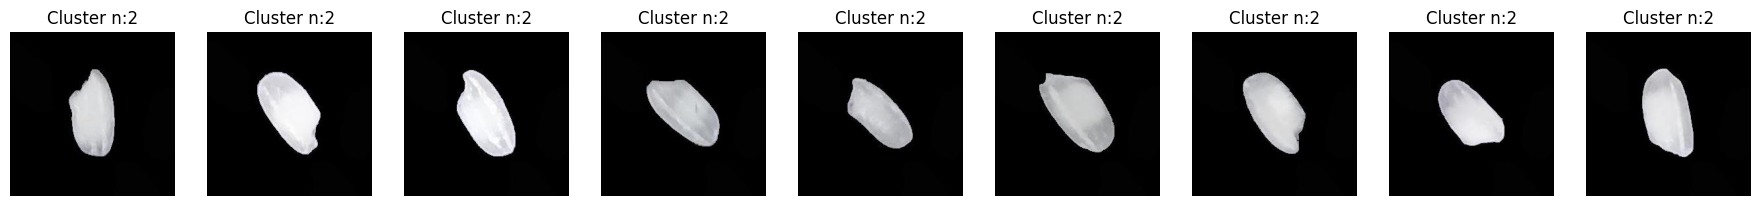

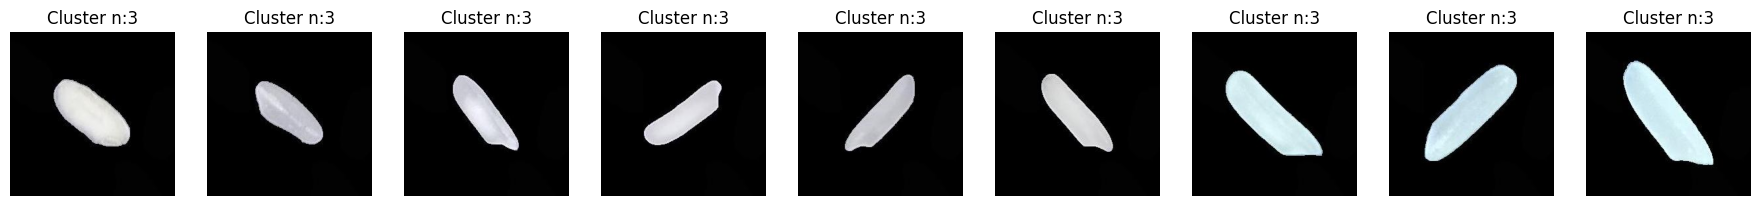

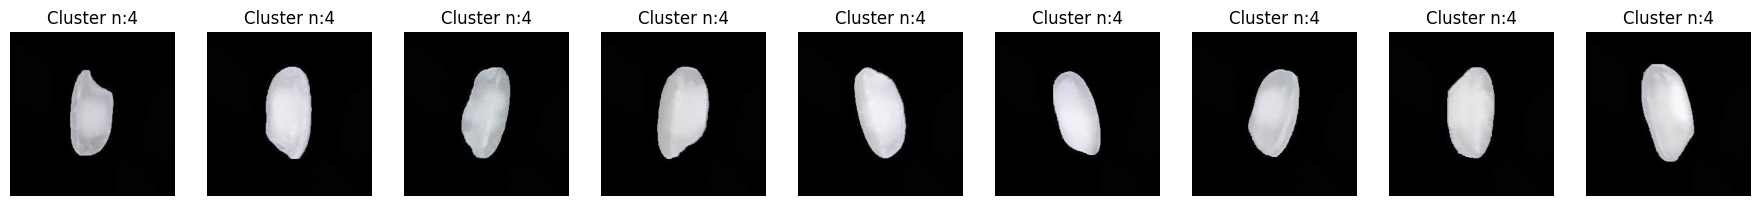

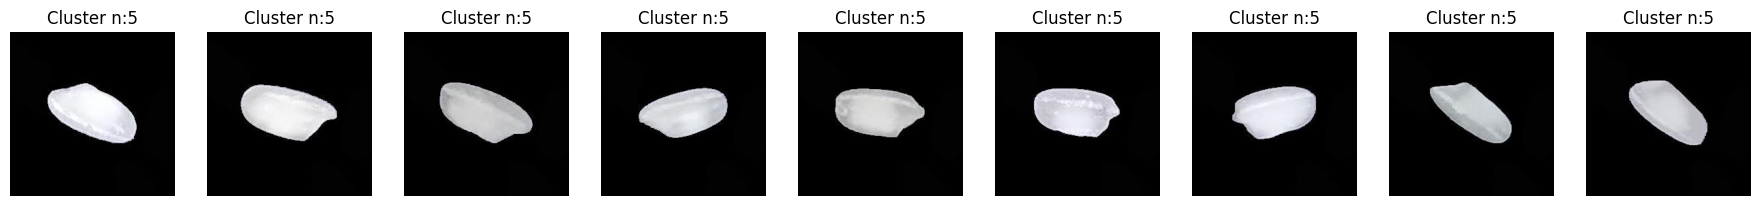

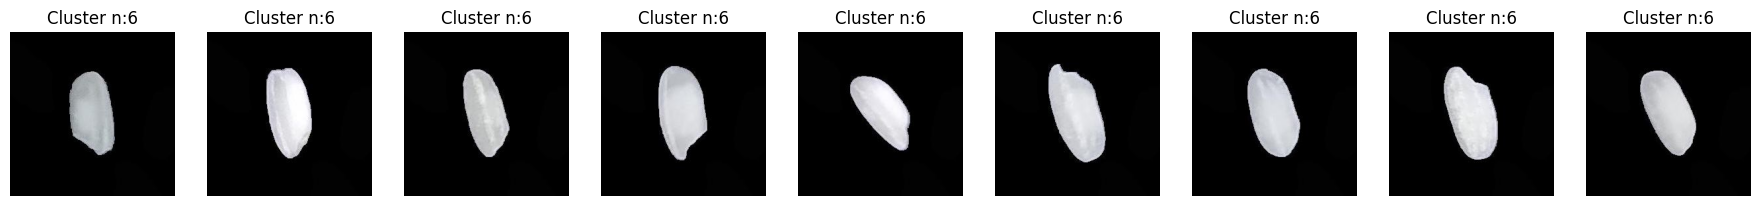

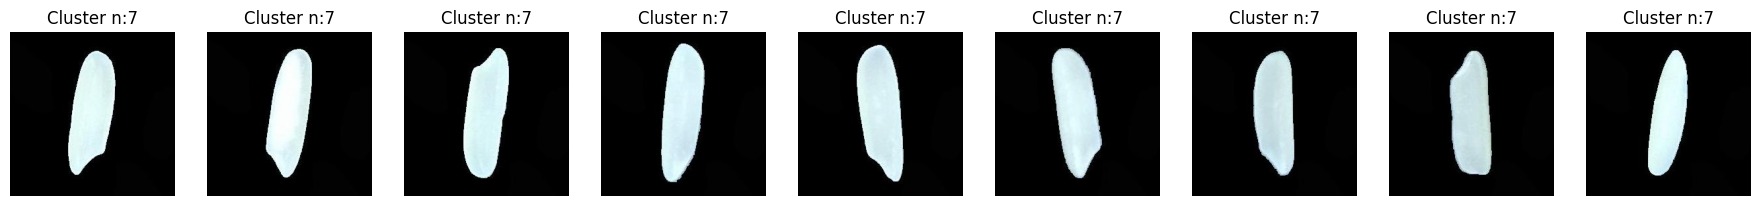

In [71]:
# Graficamos una muestra de cada cluster
for n in range(len(groups)):
  view_cluster(groups[n],n)

In [ ]:
# Veamos la matrix de confusión
# Obtenemos los labels originales a partir del arreglo names
labels_original = []

for ruta in names:
    # Dividir la ruta por la barra invertida ('\')
    partes = ruta.split('\\')
    # Obtener la última parte que contiene el nombre del archivo (ejemplo: 'Arborio (1002).jpg')
    nombre_archivo = partes[-1]
    # Dividir el nombre del archivo por el paréntesis '('
    partes_nombre = nombre_archivo.split('(')
    # Obtener el tipo de arroz eliminando el último carácter (')') y agregándolo al nuevo arreglo
    tipo_arroz = partes_nombre[0].strip()
    labels_original.append(tipo_arroz)

In [95]:
tmp = pd.DataFrame({'Labels_orig': labels_original, 'Labels_clust': modelos[6].labels_})
ct = pd.crosstab(tmp['Labels_clust'],tmp['Labels_orig'])
ct

Labels_orig,Arborio,Ipsala,Jasmine,Karacadag,basmati
Labels_clust,,,,,
0,10,7,431,0,300
1,79,5,1,895,0
2,608,59,6,100,0
3,2,0,33,0,426
4,35,486,5,3,0
5,219,437,68,2,0
6,47,6,437,0,6
7,0,0,19,0,268


In [99]:
# Rand score ajustado
ari = adjusted_rand_score(labels_original, modelos[6].labels_)
ari

0.480441128195514

In [103]:
# Van Dogen
def van_Dongen_index(labels_original, labels_pred):
    a = sum(1 for i in range(len(labels_original)) for j in range(i + 1, len(labels_original))
            if labels_original[i] == labels_original[j] and  labels_pred[i] ==  labels_pred[j])

    b = sum(1 for i in range(len(labels_original)) for j in range(i + 1, len(labels_original))
            if labels_original[i] != labels_original[j] and  labels_pred[i] == labels_pred[j])

    c = sum(1 for i in range(len(labels_original)) for j in range(i + 1, len(labels_original))
            if labels_original[i] == labels_original[j] and labels_pred[i] != labels_pred[j])

    d = sum(1 for i in range(len(labels_original)) for j in range(i + 1, len(labels_original))
            if labels_original[i] != labels_original[j] and labels_pred[i] != labels_pred[j])

    van_Dongen_index = (b + c) / (a + b + c + d)
    return van_Dongen_index

In [104]:
labels_pred =  modelos[6].labels_
print("Índice de van Dongen:", van_Dongen_index(labels_original,labels_pred))

Índice de van Dongen: 0.14700764152830567


In [73]:
# Observemos ahora con 5 clusters
groups = {}
for file, cluster in zip(names,modelos[4].labels_):
    if cluster not in groups.keys():
        groups[cluster] = []
        groups[cluster].append(file)
    else:
        groups[cluster].append(file)

Clipping cluster size from 560 to 10
Clipping cluster size from 997 to 10
Clipping cluster size from 997 to 10
Clipping cluster size from 817 to 10
Clipping cluster size from 841 to 10
Clipping cluster size from 788 to 10


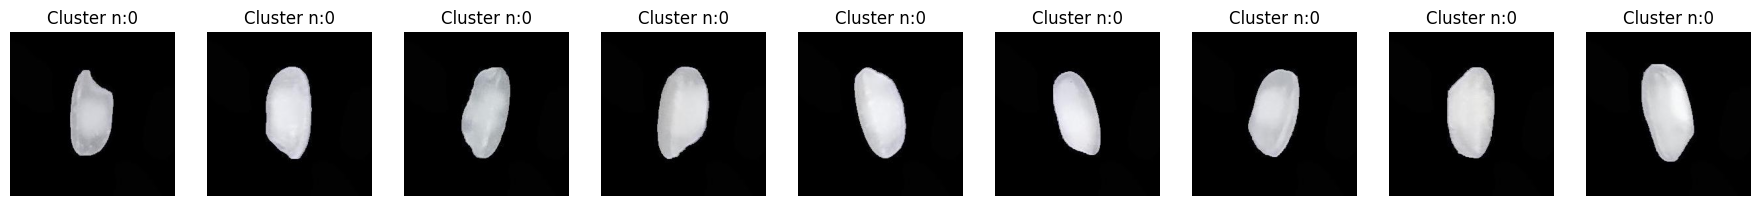

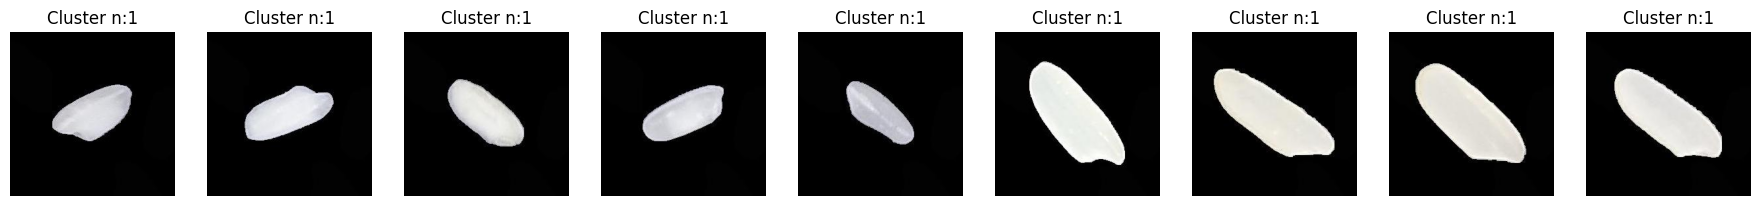

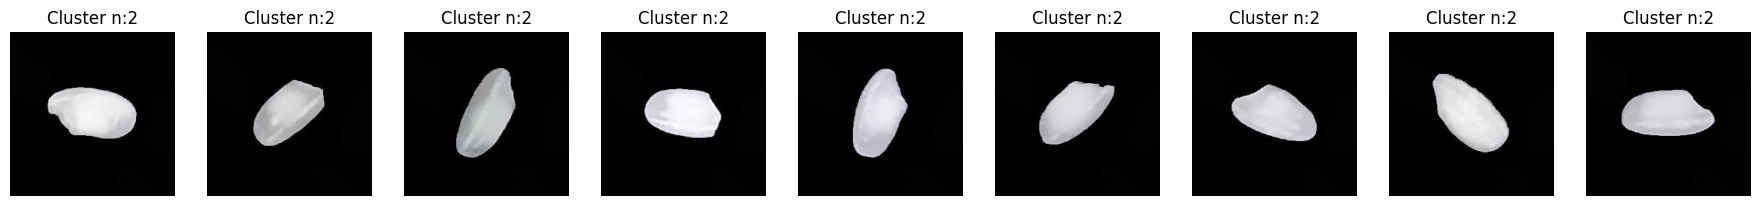

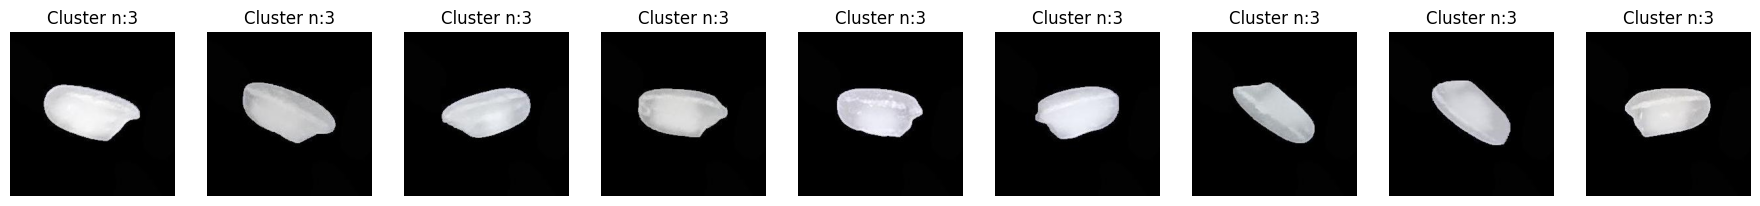

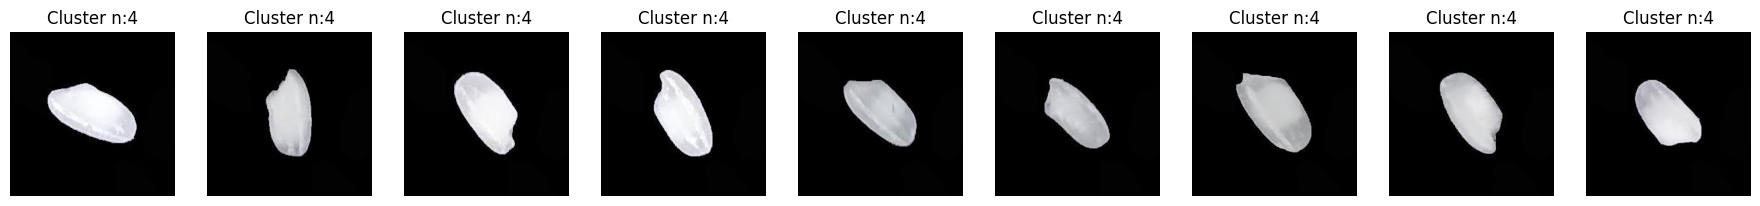

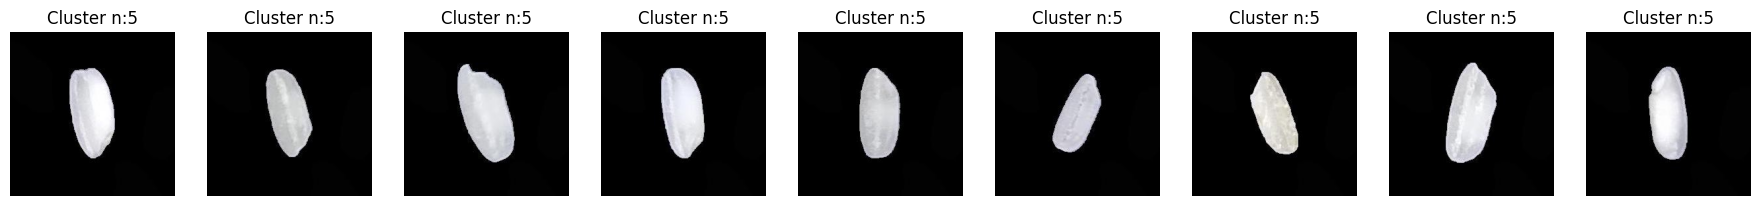

In [74]:
# Graficamos una muestra de cada cluster
for n in range(len(groups)):
  view_cluster(groups[n],n)

In [96]:
tmp = pd.DataFrame({'Labels_orig': labels_original, 'Labels_clust': modelos[4].labels_})
ct = pd.crosstab(tmp['Labels_clust'],tmp['Labels_orig'])
ct

Labels_orig,Arborio,Ipsala,Jasmine,Karacadag,basmati
Labels_clust,,,,,
0,48,501,7,3,1
1,5,5,412,0,575
2,92,7,1,897,0
3,198,409,192,2,16
4,648,77,17,98,1
5,9,1,371,0,407


## PCA